In [5]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [6]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


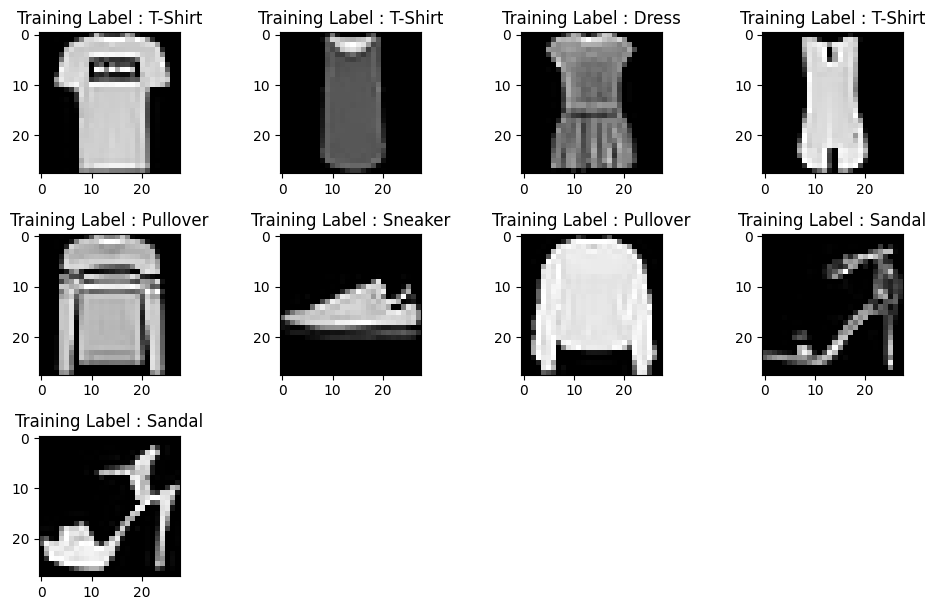

In [7]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [8]:
input_size = 784
out_size = 10

In [ ]:
## Define the model
model = nn.Sequential(
    nn.Linear(input_size, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size)
)


In [10]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#######################################

In [11]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
)


In [12]:
## Train your model
epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        images = images.view(images.shape[0], -1) 
        optimizer.zero_grad()

        output = model(images)            
        loss = criterion(output, labels)   

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader):.4f}")

    

Training loss: 0.5224
Training loss: 0.3619
Training loss: 0.3257
Training loss: 0.3007
Training loss: 0.2827
Training loss: 0.2665
Training loss: 0.2523
Training loss: 0.2407
Training loss: 0.2288
Training loss: 0.2212


 نصب نمیشدd2l عملا همون کار مت پلات لیبیو میکنه که در زیر کدش رو زدم . چون پکیچ های مربوط به d2l 

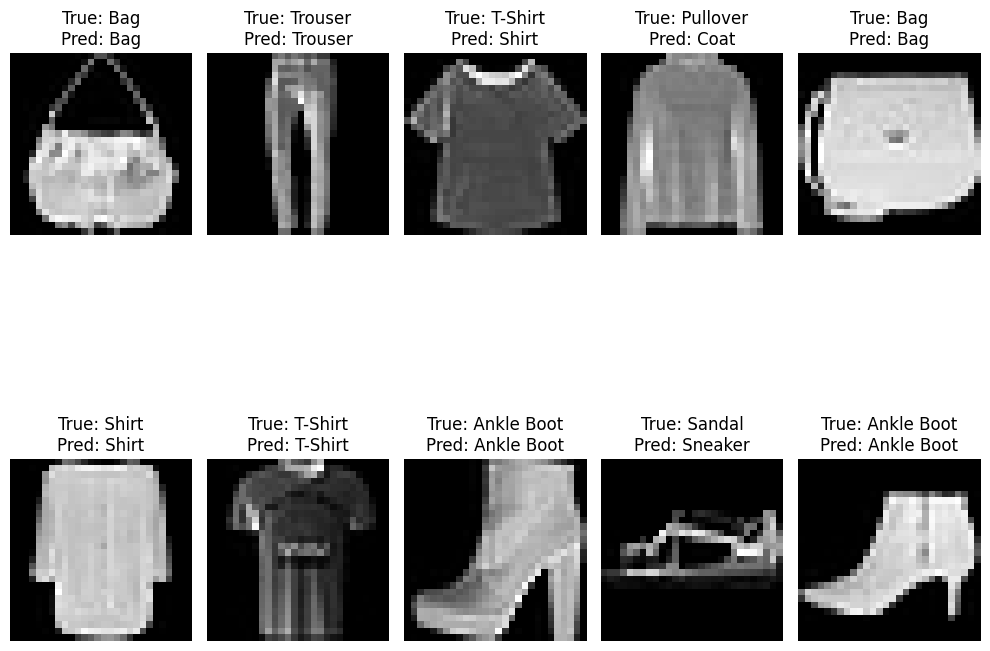

In [13]:
import matplotlib.pyplot as plt

labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

dataiter = iter(testloader)
images, labels = next(dataiter)

images_flat = images.view(images.shape[0], -1)

model.eval()
with torch.no_grad():
    outputs = model(images_flat)

_, preds = torch.max(outputs, 1)

fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(images[i][0], cmap='gray')
    ax.set_title(f"True: {labels_map[labels[i]]}\nPred: {labels_map[preds[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


## Part b

Epoch  10 - Train Loss: 0.3762 - Test Loss: 5.4664
Epoch  20 - Train Loss: 0.1295 - Test Loss: 5.1892
Epoch  30 - Train Loss: 0.0816 - Test Loss: 4.6771
Epoch  40 - Train Loss: 0.0014 - Test Loss: 5.4575
Epoch  50 - Train Loss: 0.0003 - Test Loss: 5.4205
Epoch  60 - Train Loss: 0.0002 - Test Loss: 5.4932
Epoch  70 - Train Loss: 0.0001 - Test Loss: 5.5555
Epoch  80 - Train Loss: 0.0001 - Test Loss: 5.6106
Epoch  90 - Train Loss: 0.0001 - Test Loss: 5.6595
Epoch 100 - Train Loss: 0.0001 - Test Loss: 5.7052
Final Train Accuracy: 100.00%
Final Test Accuracy:  38.26%


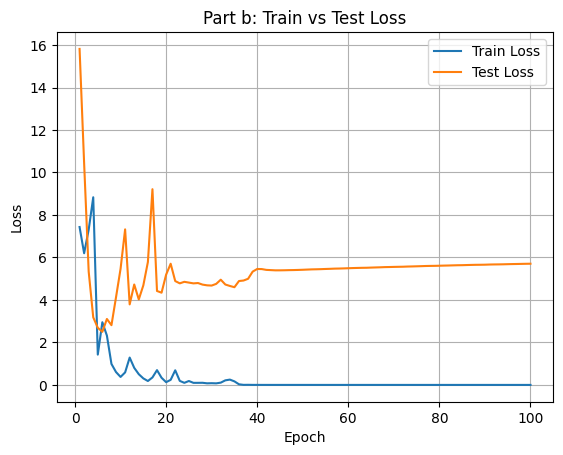

In [25]:
import torch, torch.nn as nn, torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Subset, DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

full_trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
subset_indices = list(range(20))                
trainset = Subset(full_trainset, subset_indices)
trainloader = DataLoader(trainset, batch_size=2, shuffle=True)  

testset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

def make_b():
    m = nn.Sequential(
        nn.Linear(784, 1024), nn.ReLU(),
        nn.Linear(1024, 512), nn.ReLU(),
        nn.Linear(512, 256), nn.ReLU(),
        nn.Linear(256, 10)
    )
    for layer in m:
        if isinstance(layer, nn.Linear):
            nn.init.kaiming_normal_(layer.weight)
            nn.init.zeros_(layer.bias)
    return m

model_b = make_b()
criterion_b = nn.CrossEntropyLoss()
optimizer_b = optim.SGD(model_b.parameters(), lr=0.01, momentum=0.9)

def evaluate_accuracy(model, loader):
    was_training = model.training
    model.eval()
    correct = 0; total = 0
    with torch.no_grad():
        for x, y in loader:
            x = x.view(x.size(0), -1)
            logits = model(x)
            pred = logits.argmax(1)
            total += y.size(0)
            correct += (pred == y).sum().item()
    if was_training: model.train()
    return 100 * correct / total

epochs = 100
train_losses, test_losses = [], []
for e in range(epochs):
    model_b.train()
    run_loss = 0.0
    for x, y in trainloader:
        x = x.view(x.size(0), -1)
        optimizer_b.zero_grad()
        logits = model_b(x)
        loss = criterion_b(logits, y)
        loss.backward()
        optimizer_b.step()
        run_loss += loss.item()
    avg_tr = run_loss / len(trainloader)
    train_losses.append(avg_tr)

    model_b.eval()
    tst_loss = 0.0
    with torch.no_grad():
        for x, y in testloader:
            x = x.view(x.size(0), -1)
            tst_loss += criterion_b(model_b(x), y).item()
    avg_te = tst_loss / len(testloader)
    test_losses.append(avg_te)

    if (e+1) % 10 == 0:
        print(f"Epoch {e+1:3d} - Train Loss: {avg_tr:.4f} - Test Loss: {avg_te:.4f}")

tr_acc = evaluate_accuracy(model_b, trainloader)
te_acc = evaluate_accuracy(model_b, testloader)
print(f"Final Train Accuracy: {tr_acc:.2f}%")
print(f"Final Test Accuracy:  {te_acc:.2f}%")

import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses,  label='Test Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Part b: Train vs Test Loss')
plt.legend(); plt.grid(True); plt.show()


دلایل اصلی ایجاد اورفیت در این قسمت 
مورد اول اینکه تعداد نمونه های آموزشی کم است 
مورد دوم مدل بزرگ و پیچیده است
زیادepoch مورد سوم 
Dropout بدون ،  L2 Regularization بدون 


## Part c

Epoch  10 - Train Loss: 1.2040 - Test Loss: 1.4519
Epoch  20 - Train Loss: 0.9903 - Test Loss: 1.3070
Epoch  30 - Train Loss: 1.8367 - Test Loss: 1.7445
Epoch  40 - Train Loss: 1.0501 - Test Loss: 1.7039
Epoch  50 - Train Loss: 1.0761 - Test Loss: 1.7465
Epoch  60 - Train Loss: 1.0265 - Test Loss: 1.5825
Epoch  70 - Train Loss: 1.2341 - Test Loss: 1.2942
Epoch  80 - Train Loss: 1.0725 - Test Loss: 1.7941
Epoch  90 - Train Loss: 0.9216 - Test Loss: 1.2639
Epoch 100 - Train Loss: 1.1398 - Test Loss: 1.8531
Final Train Accuracy: 70.00%
Final Test Accuracy: 56.10%


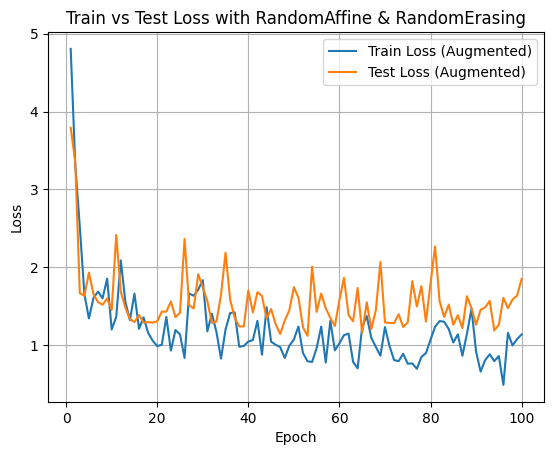

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Subset, DataLoader
import matplotlib.pyplot as plt
train_transform = transforms.Compose([
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.1), ratio=(0.3, 3.3))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

full_trainset = datasets.FashionMNIST('./data', train=True, download=True, transform=train_transform)
subset_indices = list(range(50))  
trainset = Subset(full_trainset, subset_indices)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True)

testset = datasets.FashionMNIST('./data', train=False, download=True, transform=test_transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


model = nn.Sequential(
    nn.Linear(784, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)

model.apply(init_weights)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

def train_one_epoch(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0
    for images, labels in dataloader:
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def evaluate_loss(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(dataloader)

def evaluate_accuracy(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

train_losses = []
test_losses = []
epochs = 100

for epoch in range(1, epochs+1):
    train_loss = train_one_epoch(model, trainloader, optimizer, criterion)
    test_loss = evaluate_loss(model, testloader, criterion)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch:>3} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f}")

train_acc = evaluate_accuracy(model, trainloader)
test_acc = evaluate_accuracy(model, testloader)

print(f"Final Train Accuracy: {train_acc:.2f}%")
print(f"Final Test Accuracy: {test_acc:.2f}%")

plt.plot(range(1, epochs+1), train_losses, label='Train Loss (Augmented)')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss (Augmented)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss with RandomAffine & RandomErasing')
plt.legend()
plt.grid(True)
plt.show()


## part D

Epoch  10 | Train Loss: 0.9781 | Test Loss: 1.4961
Epoch  20 | Train Loss: 0.1968 | Test Loss: 1.6526
Epoch  30 | Train Loss: 0.1207 | Test Loss: 1.3485
Epoch  40 | Train Loss: 0.0009 | Test Loss: 1.4995
Epoch  50 | Train Loss: 0.0007 | Test Loss: 1.4973
Epoch  60 | Train Loss: 0.0006 | Test Loss: 1.4821
Epoch  70 | Train Loss: 0.0005 | Test Loss: 1.4681
Epoch  80 | Train Loss: 0.0006 | Test Loss: 1.4528
Epoch  90 | Train Loss: 0.0005 | Test Loss: 1.4331
Epoch 100 | Train Loss: 0.0006 | Test Loss: 1.4165
Final Train Accuracy: 100.00%
Final Test Accuracy: 67.50%


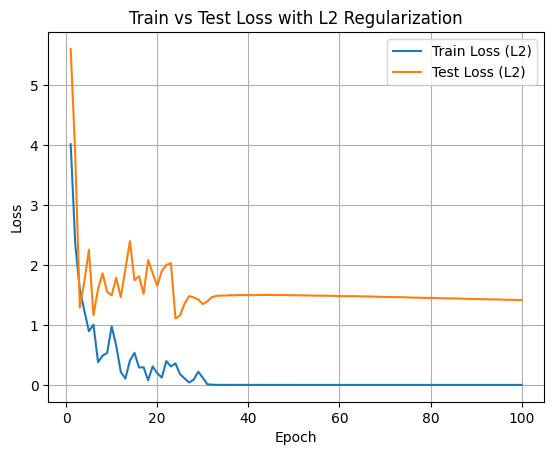

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Subset, DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

full_trainset = datasets.FashionMNIST('./data', train=True, download=True, transform=transform)
subset_indices = list(range(50))  
trainset = Subset(full_trainset, subset_indices)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True)

testset = datasets.FashionMNIST('./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(784, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)
        nn.init.zeros_(m.bias)
model.apply(init_weights)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001) 

def train_one_epoch(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0
    for images, labels in dataloader:
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def evaluate_loss(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(dataloader)

def evaluate_accuracy(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

train_losses = []
test_losses = []
epochs = 100

for epoch in range(1, epochs+1):
    train_loss = train_one_epoch(model, trainloader, optimizer, criterion)
    test_loss = evaluate_loss(model, testloader, criterion)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:>3} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

train_acc = evaluate_accuracy(model, trainloader)
test_acc = evaluate_accuracy(model, testloader)

print(f"Final Train Accuracy: {train_acc:.2f}%")
print(f"Final Test Accuracy: {test_acc:.2f}%")
plt.plot(range(1, epochs+1), train_losses, label='Train Loss (L2)')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss (L2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss with L2 Regularization')
plt.legend()
plt.grid(True)
plt.show()


## part E

Epoch  10 - Train Loss: 1.8053 - Test Loss: 1.6978
Epoch  20 - Train Loss: 1.1288 - Test Loss: 1.3846
Epoch  30 - Train Loss: 1.2058 - Test Loss: 1.2973
Epoch  40 - Train Loss: 1.3230 - Test Loss: 1.8614
Epoch  50 - Train Loss: 0.8317 - Test Loss: 1.6217
Epoch  60 - Train Loss: 1.0134 - Test Loss: 1.4392
Epoch  70 - Train Loss: 0.8059 - Test Loss: 1.6024
Epoch  80 - Train Loss: 0.5051 - Test Loss: 1.4075
Epoch  90 - Train Loss: 0.4081 - Test Loss: 1.6180
Epoch 100 - Train Loss: 0.7334 - Test Loss: 1.6712
Train Accuracy: 86.00%
Test Accuracy: 57.60%


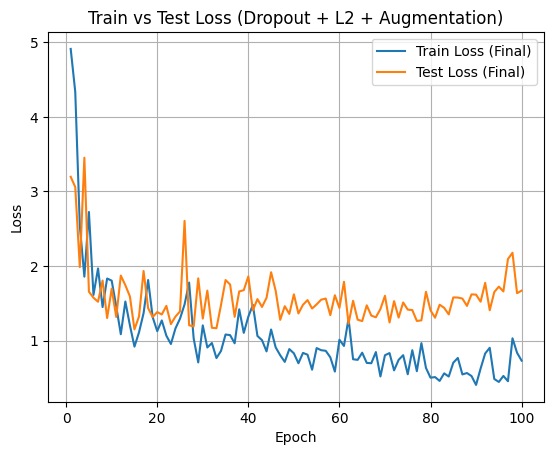

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Subset, DataLoader
import matplotlib.pyplot as plt
train_transform = transforms.Compose([
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.95, 1.05)),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.05), ratio=(0.5, 1.5)),
    transforms.Normalize((0.1307,), (0.3081,))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

full_trainset = datasets.FashionMNIST('./data', train=True, download=True, transform=train_transform)
subset_indices = list(range(50))
trainset = Subset(full_trainset, subset_indices)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True)

testset = datasets.FashionMNIST('./data', train=False, download=True, transform=test_transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

model = nn.Sequential(
    nn.Linear(784, 1024),
    nn.ReLU(),
    nn.Dropout(0.3),  
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)

model.apply(init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.001)
train_losses = []
test_losses = []
epochs = 100

def evaluate_accuracy(model, dataloader):
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in dataloader:
            x = x.view(x.size(0), -1)
            outputs = model(x)
            preds = torch.argmax(outputs, 1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    return 100 * correct / total

for epoch in range(1, epochs+1):
    model.train()
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        if torch.isnan(loss): 
            print("NaN!")
            break
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)

    model.eval()
    test_loss = 0
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    avg_test_loss = test_loss / len(testloader)
    test_losses.append(avg_test_loss)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:>3} - Train Loss: {avg_train_loss:.4f} - Test Loss: {avg_test_loss:.4f}")

train_acc = evaluate_accuracy(model, trainloader)
test_acc = evaluate_accuracy(model, testloader)
print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")

plt.plot(range(1, epochs+1), train_losses, label='Train Loss (Final)')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss (Final)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss (Dropout + L2 + Augmentation)')
plt.legend()
plt.grid(True)
plt.show()
